Four Classes Expanding and One Class Fixed. Bidimensional.
100 batches of 1645 instances



METHOD: Static knn as classifier
Execution time:  82.83052451139773
Average error: 1.9734
Average macro-F1: 0.9796246598236599
Average micro-F1: 0.9807000000000001
Average Accuracy:  98.0266
Standard Deviation:  0.415098108885
Variance:  0.17230644


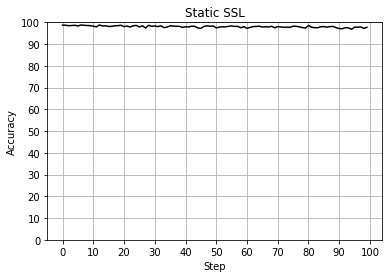

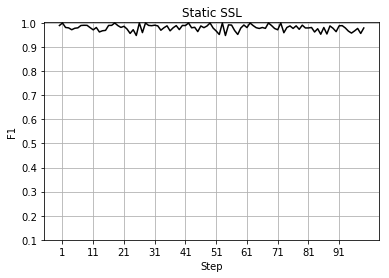

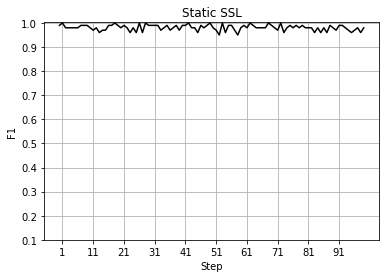




METHOD: Sliding knn as classifier
Execution time:  8.007010762662418
Average error: 1.8992
Average macro-F1: 0.9790407054622527
Average micro-F1: 0.9795
Average Accuracy:  98.1008
Standard Deviation:  0.427975887171
Variance:  0.18316336


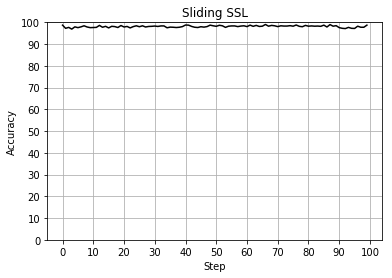

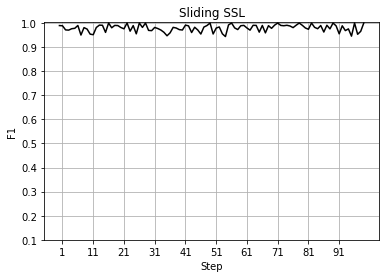

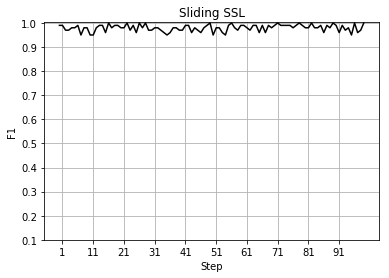




METHOD: Incremental knn as classifier
Execution time:  424.9539697959625
Average error: 1.8171
Average macro-F1: 0.9812089592473984
Average micro-F1: 0.9821000000000001
Average Accuracy:  98.1829
Standard Deviation:  0.410816978714
Variance:  0.16877059


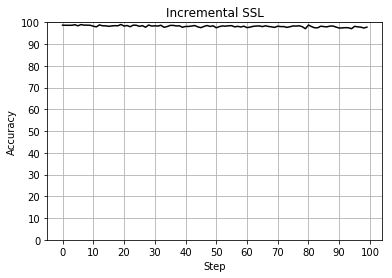

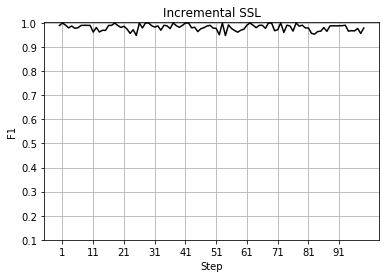

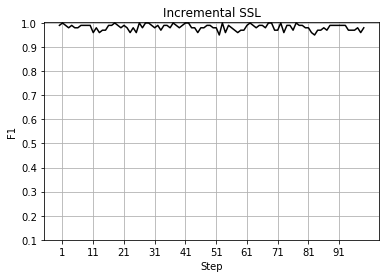




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  21.187794098649192
Average error: 1.7276
Average macro-F1: 0.9804337053318719
Average micro-F1: 0.9808999999999999
Average Accuracy:  98.2724
Standard Deviation:  0.432097489
Variance:  0.18670824


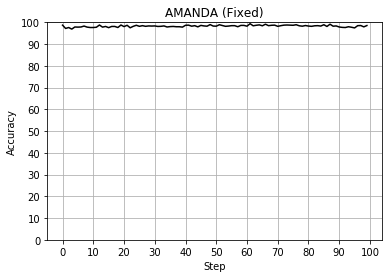

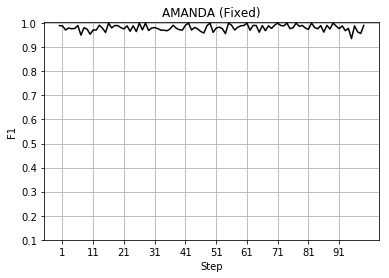

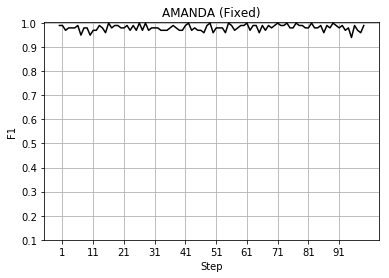




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  24.933208915275486
Average error: 1.8902
Average macro-F1: 0.9800212518890461
Average micro-F1: 0.9804
Average Accuracy:  98.1098
Standard Deviation:  0.430652946118
Variance:  0.18546196


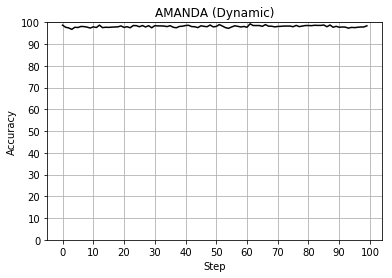

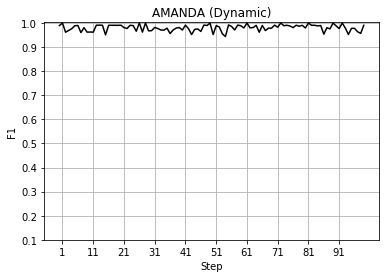

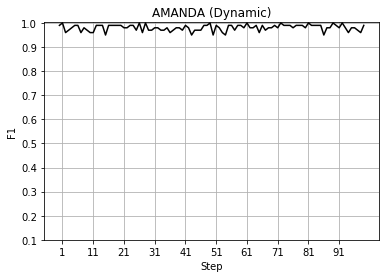




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  103.14088448755183
Average error: 2.3786
Average macro-F1: 0.9761863165014898
Average micro-F1: 0.9763
Average Accuracy:  97.6214
Standard Deviation:  0.672595004442
Variance:  0.45238404


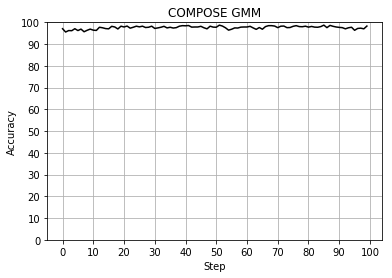

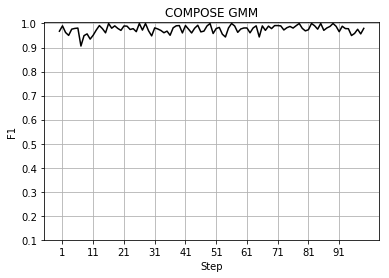

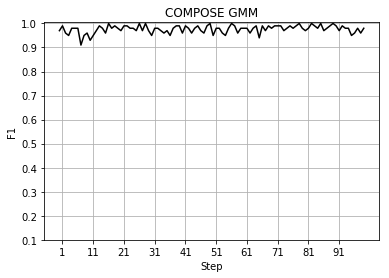




Method: Level IW
Execution time:  103.14088448755183
Average macro-F1: 0.1972541373971421
Average micro-F1: 0.20149999999999998
Average Accuracy:  97.799396
Standard Deviation:  0.423031455786
Variance:  0.178955612584


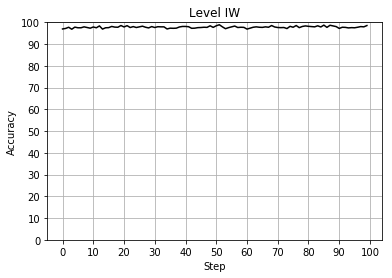

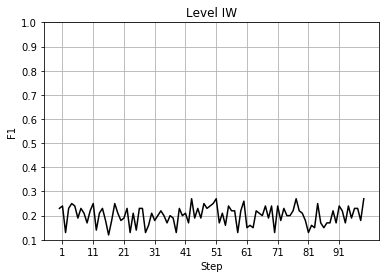

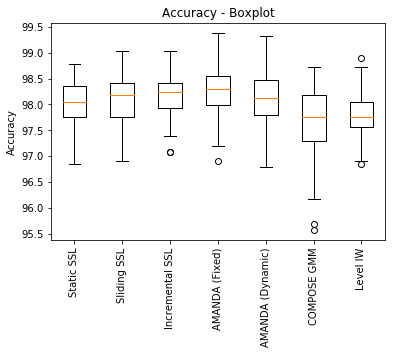

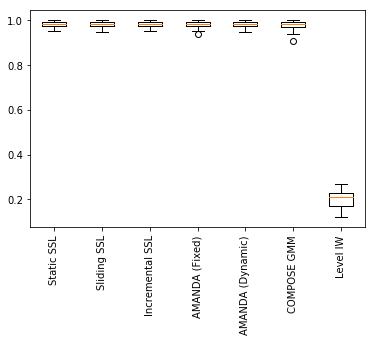

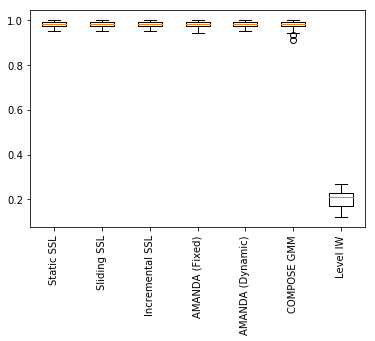

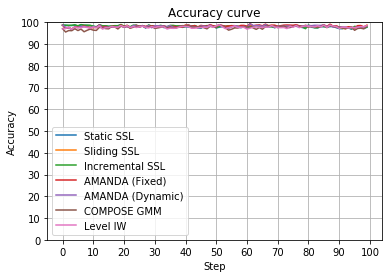

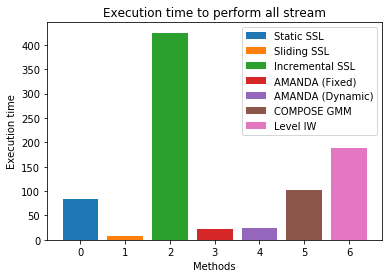

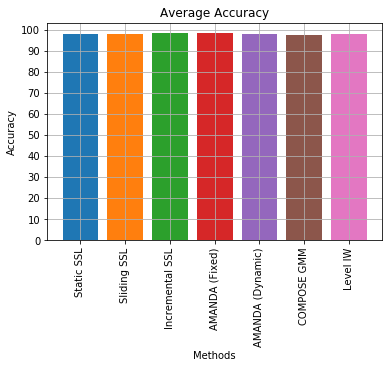

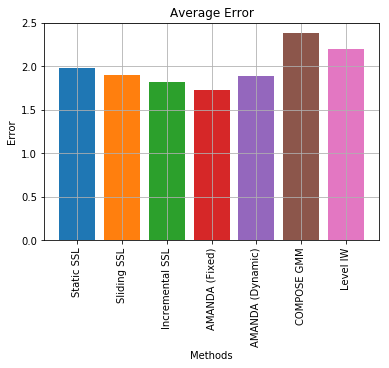

Error reduction: 0.0756937402705
Error reduction: 0.159446517578
Error reduction: 0.250748266287
Error reduction: 0.0848749217049
Error reduction: -0.413357190803
Error reduction: -0.231777905181


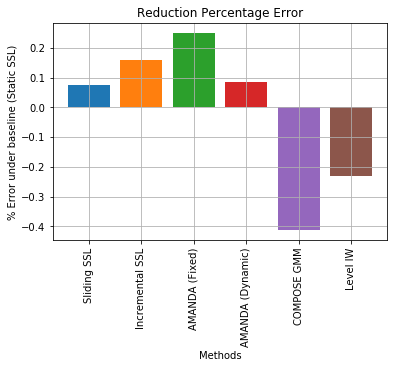

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'knn' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load4CE1CF(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 5, 0.8, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '4CE1CF', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()